In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("cdata.csv")
XY = data[["x", "y"]]
clusters = data["cluster"]

data_tuples = [tuple(x) for x in XY.to_numpy()]   # 將每個row的(x,y)點 做成tuple
len(data_tuples)

def get_distance(point1, point2):   # 取出兩點距離
    return ((point1[0]-point2[0])**2 + (point1[1] - point2[1])**2 )**0.5 #原本是不是打錯了?

def initial_centroid(data, k=4):   #找出最原始 隨機的centroid
    random_index = []              #隨機在這些點中 取k個點
    """
    for i in range(k):
        index = np.random.randint(len(data))
        random_index.append(index)
    """
    random_index = np.random.randint(len(data), size=k+1000) #確保選到的點不重複
    random_index = np.unique(random_index)
    random_index = random_index[:k]

    centroids = []
    for i in random_index:
        x = float(data["x"][i])
        y = float(data["y"][i])
        centroids.append((x,y))   #回傳點
    return centroids
    
def get_labels(data, centroids):  #label就是遍歷所有點 每個點經過k個centroid去量距離 
    labels = []                   #透過取距離 找出k群中最小的  並分配給那個centroid(已經編好號碼from 0 to k-1)
    for point in data:            #最後回傳
        k_distance = []
        min_distance = 0
        label = None
        for i, centroid in enumerate(centroids):
            new_distance = get_distance(point, centroid)
            k_distance.append(new_distance)
        
        label = k_distance.index(min(k_distance))
        labels.append(label)
    return labels


def update_centroids(points, labels, k=4):
    new_centroids = []                         # 因為centroid會一直變動(改變群體的中心)
                                               # 這邊是取出每個群中的所有x, y進行加總 再去取平均
    for i in range(k):                         # 新的各群centroid變出現了 再回傳
        temp_x = []
        temp_y = []
        for j in range(len(points)):
            if labels[j] == i:
                temp_x.append(points[j][0])
                temp_y.append(points[j][1])
        x_mean = np.nanmean(temp_x)
        y_mean = np.nanmean(temp_y)
        new_centroids.append((round(x_mean,4), round(y_mean,4)))
        
    return new_centroids

def points(centroids):                        #這邊只是想要區隔出來centroid的x,y
    listx = [x[0] for x in centroids]
    listy = [y[1] for y in centroids]
    return (listx, listy)

        
def kmeans_main(XY,k,clusters):             #主程式在這邊 包含了上述的function
    centroids = initial_centroid(XY, k)     #順便紀錄每個cemtroid點的變化
    old_centroids = centroids
    updated_new_centroids = []
    print("old_centroids",old_centroids)
    print("Initial plot: ")
    
    label_color = [LABEL_COLOR_MAP[l] for l in clusters]  #這邊是顏色 與散布圖的製作
    plt.scatter(XY["x"], XY["y"], c=label_color)
    old = points(old_centroids)
    plt.scatter(old[0], old[1], c = "r", marker="x")
    plt.show()
     
    for i in range(30):                          #預設完成每個不同k的kmeans方法 需要30次以內的分群 但也有可能更多
        labels = get_labels(data_tuples, old_centroids)
        new_centroids = None
        new_centroids = update_centroids(data_tuples, labels, k)
    
        if new_centroids not in updated_new_centroids:  #紀錄每個的變化 直到說centroid list的各centroid point
            updated_new_centroids.append(new_centroids) #不會再更動為止
            print(f"{i+1}st/nd/th_centroids",new_centroids)
            label_color = [LABEL_COLOR_MAP[l] for l in labels]
            plt.scatter(XY["x"], XY["y"], c=label_color)
            new = points(new_centroids)
            plt.scatter(new[0], new[1], c = "r", marker="x")
            plt.show()
        
        else:
            print("final_centroids",new_centroids)
            break
        
        old_centroids = new_centroids
        
def sse(XY,k,clusters):                        #計算SSE的函式 要回傳最後不會更動的centroid list 還有對應的label
    centroids = initial_centroid(XY, k)
    old_centroids = centroids
    updated_new_centroids = []
    
    for i in range(30):
        labels = get_labels(data_tuples, old_centroids)
        new_centroids = None
        new_centroids = update_centroids(data_tuples, labels, k)
    
        if new_centroids not in updated_new_centroids:
            updated_new_centroids.append(new_centroids)
        else:
            
            return new_centroids,labels
            break
        
        old_centroids = new_centroids

old_centroids [(2.1364, 0.8369), (7.4096, -1.4137), (7.8149, -1.0186), (1.8925, 1.2714), (0.2617, 3.4376), (1.597, -1.8082), (4.3812, 1.4137), (8.4321, -0.2049), (8.6604, -0.7111), (2.7778, -1.7124)]
Initial plot: 


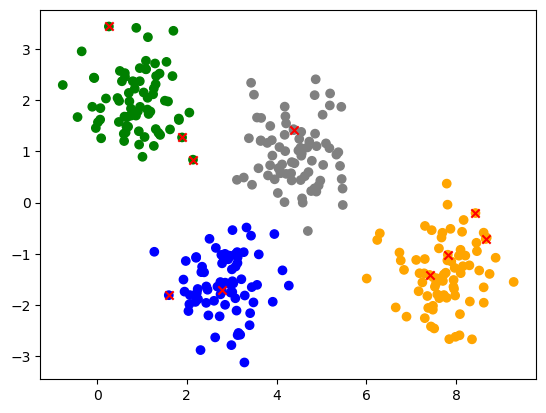

1st/nd/th_centroids [(2.9929, 0.529), (7.4128, -1.7452), (7.9133, -1.0489), (1.0698, 1.6802), (0.5465, 2.439), (1.8962, -1.667), (4.4666, 0.9715), (8.0665, -0.1577), (8.6915, -1.0723), (2.9583, -1.5731)]


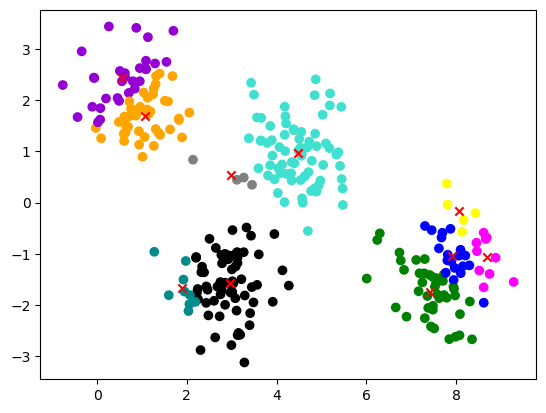

2st/nd/th_centroids [(3.1825, 0.5077), (7.4077, -1.7704), (7.8658, -1.084), (1.056, 1.6404), (0.5954, 2.4424), (2.1036, -1.6471), (4.4945, 0.9718), (7.9304, -0.2512), (8.6846, -1.1526), (3.073, -1.5827)]


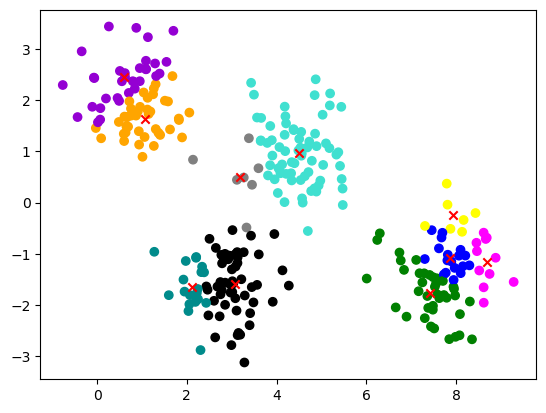

3st/nd/th_centroids [(3.4004, 0.6078), (7.384, -1.7661), (7.8758, -1.1438), (1.0312, 1.6387), (0.6134, 2.4697), (2.2033, -1.6839), (4.5377, 0.9832), (7.8515, -0.3209), (8.6257, -1.2182), (3.1408, -1.556)]


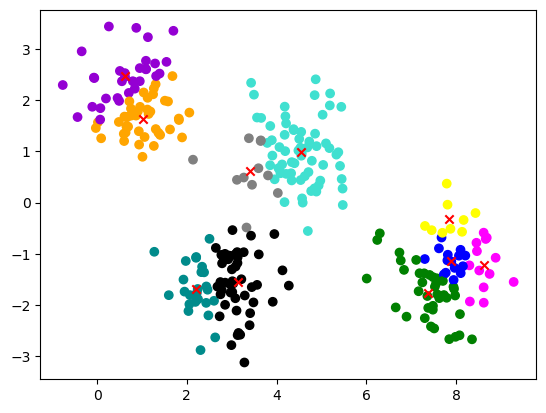

4st/nd/th_centroids [(3.574, 0.958), (7.3828, -1.8052), (7.8973, -1.2377), (1.0018, 1.6222), (0.6521, 2.4913), (2.2236, -1.7045), (4.6607, 0.945), (7.6944, -0.3793), (8.6257, -1.2182), (3.153, -1.5206)]


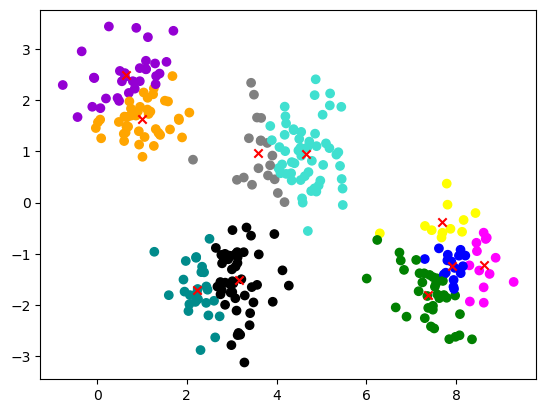

5st/nd/th_centroids [(3.7227, 0.9996), (7.3897, -1.847), (7.8911, -1.286), (1.0121, 1.5696), (0.6936, 2.4806), (2.2405, -1.7022), (4.7271, 0.9277), (7.5734, -0.4086), (8.6257, -1.2182), (3.1628, -1.5181)]


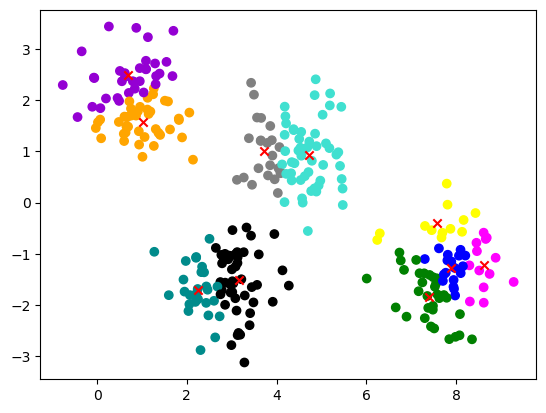

6st/nd/th_centroids [(3.8173, 1.0745), (7.4055, -1.8883), (7.8958, -1.328), (1.0058, 1.5531), (0.7099, 2.4734), (2.2405, -1.7022), (4.7984, 0.8711), (7.5091, -0.4522), (8.6523, -1.1587), (3.1628, -1.5181)]


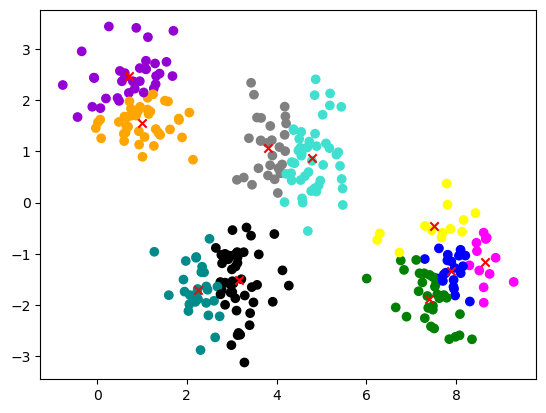

7st/nd/th_centroids [(3.8648, 1.0802), (7.4131, -1.9312), (7.8893, -1.3561), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.4897, -0.5262), (8.6523, -1.1587), (3.1628, -1.5181)]


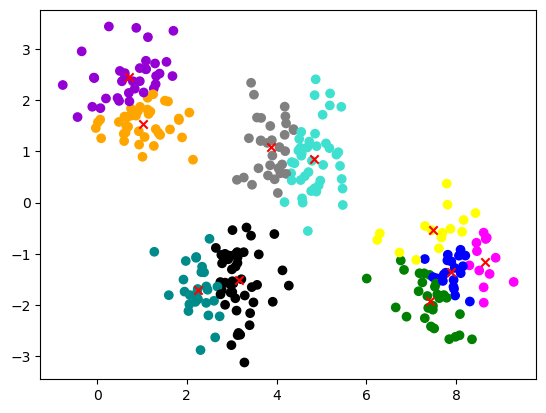

8st/nd/th_centroids [(3.8648, 1.0802), (7.4382, -1.9818), (7.8946, -1.3716), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.3739, -0.6202), (8.6353, -1.0854), (3.1628, -1.5181)]


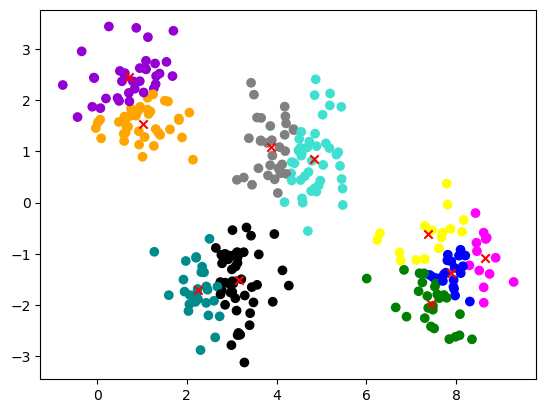

9st/nd/th_centroids [(3.8648, 1.0802), (7.4658, -2.0544), (7.8347, -1.3981), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.293, -0.6666), (8.5732, -1.0477), (3.1628, -1.5181)]


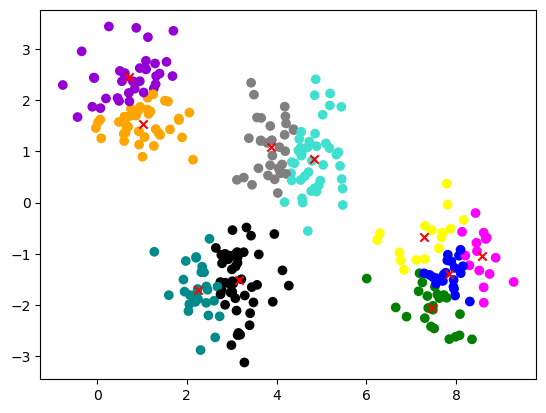

10st/nd/th_centroids [(3.8648, 1.0802), (7.5496, -2.1372), (7.7791, -1.4301), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.5214, -0.9988), (3.1628, -1.5181)]


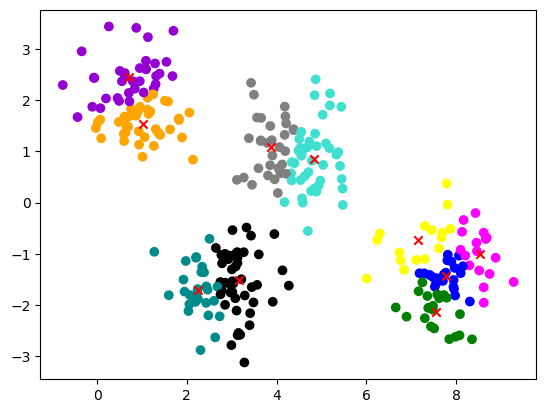

11st/nd/th_centroids [(3.8648, 1.0802), (7.5655, -2.1676), (7.7421, -1.4538), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.496, -1.0009), (3.1628, -1.5181)]


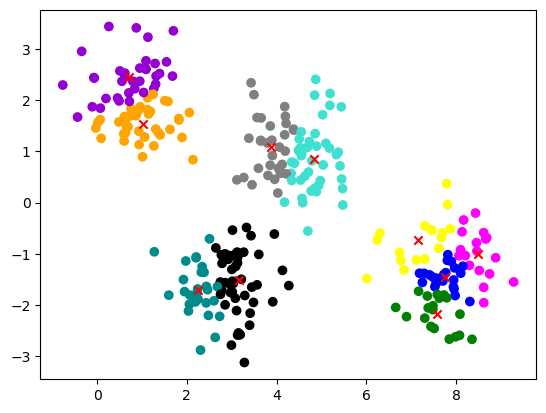

12st/nd/th_centroids [(3.8648, 1.0802), (7.5564, -2.1877), (7.7229, -1.4794), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.4778, -1.0136), (3.1628, -1.5181)]


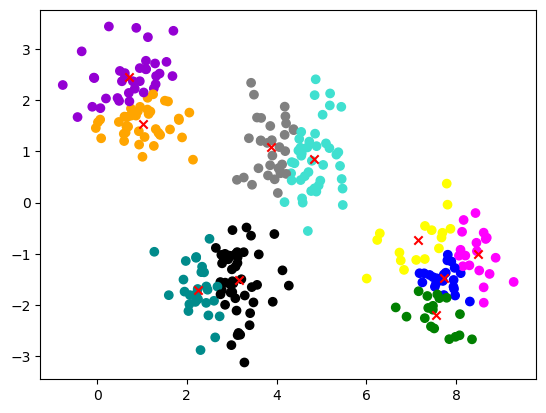

13st/nd/th_centroids [(3.8648, 1.0802), (7.5404, -2.2329), (7.7197, -1.5083), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.4778, -1.0136), (3.1628, -1.5181)]


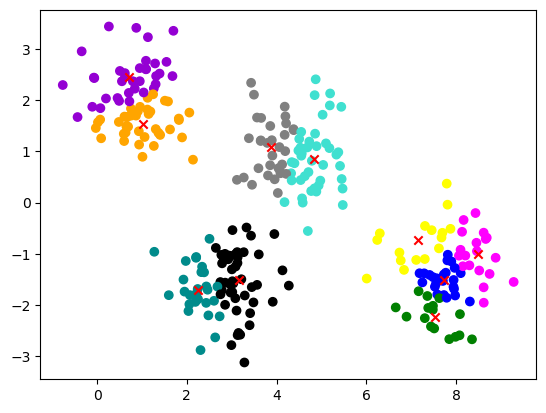

14st/nd/th_centroids [(3.8648, 1.0802), (7.5612, -2.2949), (7.6947, -1.5306), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.4778, -1.0136), (3.1628, -1.5181)]


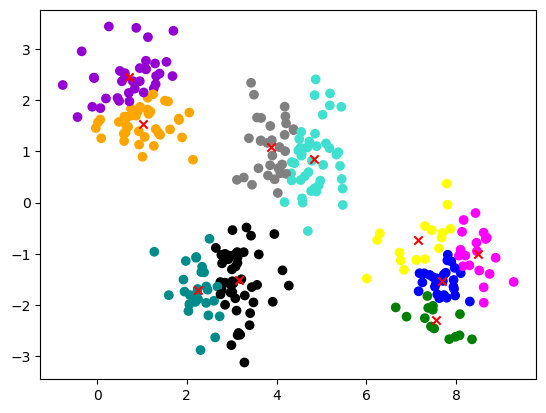

15st/nd/th_centroids [(3.8648, 1.0802), (7.5767, -2.331), (7.6823, -1.5415), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.4778, -1.0136), (3.1628, -1.5181)]


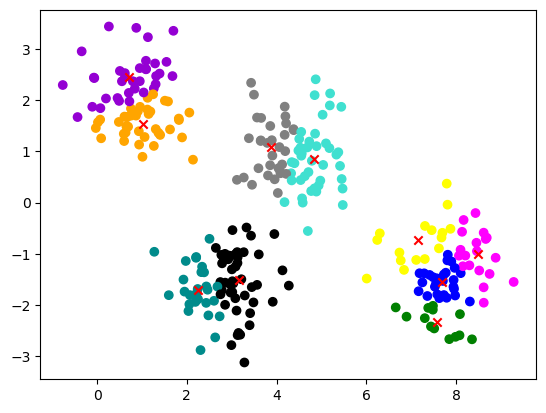

final_centroids [(3.8648, 1.0802), (7.5767, -2.331), (7.6823, -1.5415), (1.0132, 1.5423), (0.7101, 2.4595), (2.2405, -1.7022), (4.8315, 0.8526), (7.158, -0.7381), (8.4778, -1.0136), (3.1628, -1.5181)]


In [23]:
LABEL_COLOR_MAP = {0 : 'grey',
                   1 : 'green',
                   2 : 'blue',
                   3 : 'orange',
                   4 : 'darkviolet',
                   5 : 'darkcyan',
                   6 : 'turquoise',
                   7 :  'yellow',
                   8 : 'magenta',
                   9:  'black'}


k=10
kmeans_main(XY,k,clusters)


In [24]:
SSE_list = []

for k in range(2,11):         #利用label 去計算每隔cluster的centroid 與他們的points 的距離 進行加總後的k個結果
    a=(sse(XY,k,clusters))
    centroids = a[0]
    labels = a[1]
    
    SSE = []
    for i in range(k):
        temp = 0
        for j in range(len(labels)):  #計算距離 每個點與屬於該label的centroid
            if labels[j] == i:
                temp += (data_tuples[j][0]-centroids[i][0])**2 + (data_tuples[j][1]-centroids[i][1])**2
        SSE.append(temp)

    SSE_list.append(sum(SSE))
SSE_list    


[1190.7810073099993,
 546.8913462400001,
 523.65876556,
 195.04878871999995,
 171.81620803999994,
 153.16672183999998,
 141.93646382999998,
 132.06514163999998,
 123.67125490000001]

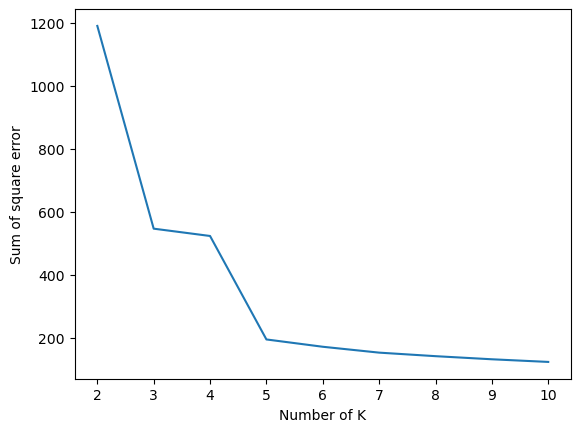

In [28]:
xk = [i+2 for i in range(9)]       #劃出k=5的圖形(因為10個以上會嚴重出現bug 電腦會運作很久)
plt.plot(xk, SSE_list)             # 所以最後只有劃出5個 但還是有找到k=4會有kneeling point
plt.xlabel('Number of K') 
plt.ylabel('Sum of square error')
plt.show()

In [29]:
SSE_list = []

for i in range(4):
    k=4
    a=(sse(XY,k,clusters))
    centroids = a[0]
    labels = a[1]
    
    SSE = []
    for i in range(k):
        temp = 0
        for j in range(len(labels)):
            if labels[j] == i:
                temp += (data_tuples[j][0]-centroids[i][0])**2 + (data_tuples[j][1]-centroids[i][1])**2
        SSE.append(temp)

    SSE_list.append(sum(SSE))
SSE_list  


[523.65876556, 523.65876556, 523.65876556, 523.65876556]

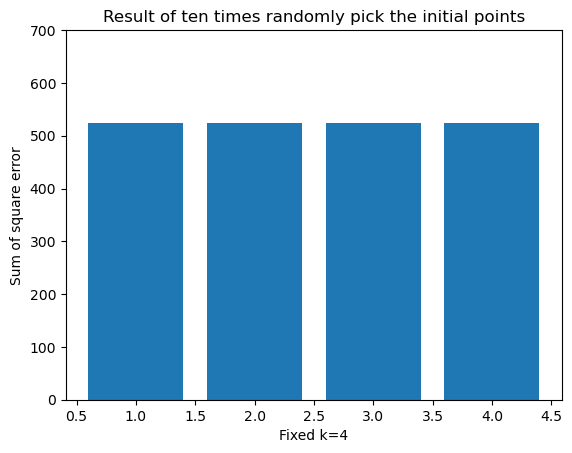

In [33]:
xk_10 = [i+1 for i in range(4)]  #最後劃出執行4次的SSE 基本上算是平均的
plt.bar(xk_10,SSE_list)
plt.title('Result of ten times randomly pick the initial points')
plt.xlabel('Fixed k=4')
plt.ylabel('Sum of square error')
plt.ylim(0,700)
plt.show()